In [ ]:
import pandas as pd

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1uZJ-POKEc2kEkw_jCQThbN3Sf4SQ6Hbx'})

In [ ]:
fileDownloaded.GetContentFile('OQ - Question Data - Part 1.csv.csv')

In [ ]:
df = pd.read_csv('OQ - Question Data - Part 1.csv.csv')
df.head()

,Quesh,Quesh Date,Total Respo,Avg Rating
0,"If a sandwich was named after you, what would ...",2022-01-10,0,NaN
1,What have you learned about love?,2022-01-09,0,NaN
2,What would you like younger generations to know?,2022-01-08,0,NaN
3,Which one condiment could you not live without?,2022-01-07,18,3.78
4,"If you had to win a game to save your life, wh...",2022-01-06,18,3.67


In [ ]:
# Delete the first three rows which has no respo and average rating
df=df[3:]
df

,Quesh,Quesh Date,Total Respo,Avg Rating
3,Which one condiment could you not live without?,2022-01-07,18,3.78
4,"If you had to win a game to save your life, wh...",2022-01-06,18,3.67
5,What’s your favorite food combo?,2022-01-05,16,3.56
6,Which ad jingle comes to mind first?,2022-01-04,21,3.57
7,Which song(s) sum up your life?,2022-01-03,13,4.23
...,...,...,...,...
95,What has been the best decision you've ever made?,2021-10-07,11,4.00
96,What weird food combination do you enjoy most?,2021-10-06,14,3.86
97,Who has been your best teacher and why?,2021-10-05,18,4.50
98,Homemade Tacos or Restaurant Tacos?,2021-10-04,10,4.60


1. The Distribution of Average Rating

In [ ]:
df['Avg Rating'].describe()

count    97.000000
mean      4.078351
std       0.351789
min       3.300000
25%       3.820000
50%       4.080000
75%       4.330000
max       4.910000
Name: Avg Rating, dtype: float64

In [ ]:

Rating_group=[]
for i in df["Avg Rating"]:
  if i>0 and i<=0.5:
    Rating_group.append("0-0.5")
  if i>0.5 and i<=1:
    Rating_group.append("0.5-1")
  if i>1 and i<=1.5:
    Rating_group.append("1-1.5")
  if i>1.5 and i<=2:
    Rating_group.append("2-2.5")
  if i>2.5 and i<=3:
    Rating_group.append("2.5-3")
  if i>3 and i<=3.5:
    Rating_group.append("3-3.5")
  if i>3.5 and i<=4:
    Rating_group.append("3.5-4")
  if i>4 and i<=4.5:
    Rating_group.append("4-4.5")
  if i>4.5 and i<=5:
    Rating_group.append(">4.5")


df['Rating_group']=Rating_group


In [ ]:
# Distribution of Avg Rating
Rating=pd.DataFrame(df['Avg Rating'].groupby(df['Rating_group']).count())

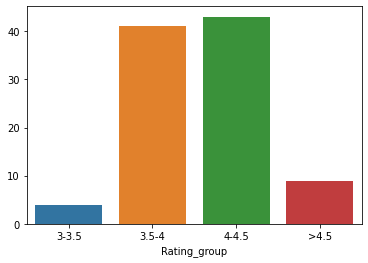

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p=sns.barplot(data=Rating.T)


2. The distribution of total response

In [ ]:
df['Total Respo'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


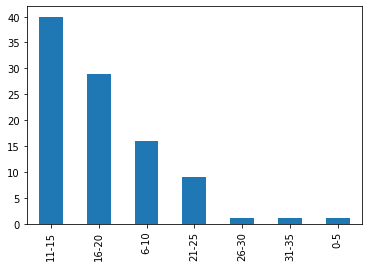

In [ ]:
df['Response_counts'] = df['Total Respo'].copy()

index = 3
for i in df['Response_counts']:
  if i >= 0 and i <= 5:
    df['Response_counts'][index] = '0-5'
  if i >= 6 and i <= 10:
    df['Response_counts'][index] = '6-10'
  if i >= 11 and i <= 15:
    df['Response_counts'][index] = '11-15'
  if i >= 16 and i <= 20:
    df['Response_counts'][index] = '16-20'
  if i >= 21 and i <= 25:
    df['Response_counts'][index] = '21-25'
  if i >= 26 and i <= 30:
    df['Response_counts'][index] = '26-30'
  if i >= 31 and i <= 35:
    df['Response_counts'][index] = '31-35'
  index += 1

df['Response_counts'].head()

df['Response_counts'] = df['Response_counts'].to_frame()
df['Response_counts'].value_counts().plot(kind="bar")
plt.show()